# Real Estate Price Forecasting
#### Capstone in Data Science  - Dr Chaojie (Jay) Wang
#### Author: Sai Teja Gunamoni

## Problem Statement

To precisely forecast the cost of real estate properties by taking into account a specific set of parameters, including size, location, number of bedrooms, and other pertinent aspects. To help buyers, sellers, and investors make wise decisions, the objective is to create a machine learning model that can accurately represent the intricate relationships that exist between these features and the price of the property.

## Importing the Libraries

In [7]:
# Importing relevant libraries in order to carry out the analysis
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [8]:
df = pd.read_excel("House_Price_Details.xlsx")

## Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [36]:
df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                float64
coast               float64
sight               float64
condition           float64
quality             float64
ceil_measure        float64
basement            float64
yr_built            float64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area          float64
dtype: object

In [10]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [11]:
df.describe(include='all')

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
count,2.161300e+04,21613,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21571.0,21612.0,21556.000000,...,21612.000000,21612.0,21613.000000,21613.000000,21613.000000,21613.00,21447.000000,21584.000000,21584.000000,21584
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,7.0,3.0,NaN,...,NaN,117.0,NaN,NaN,NaN,753.00,NaN,NaN,NaN,11145
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,...,NaN,2014.0,NaN,NaN,NaN,-122.29,NaN,NaN,NaN,$
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,10647.0,21421.0,NaN,...,NaN,559.0,NaN,NaN,NaN,116.00,NaN,NaN,NaN,39
mean,4.580302e+09,NaN,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,NaN,NaN,0.234366,...,291.522534,NaN,84.402258,98077.939805,47.560053,NaN,1987.065557,12766.543180,0.196720,NaN
std,2.876566e+09,NaN,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,NaN,NaN,0.766438,...,442.580840,NaN,401.679240,53.505026,0.138564,NaN,685.519629,27286.987107,0.397528,NaN
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,98001.000000,47.155900,NaN,399.000000,651.000000,0.000000,NaN
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,98033.000000,47.471000,NaN,1490.000000,5100.000000,0.000000,NaN
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,98065.000000,47.571800,NaN,1840.000000,7620.000000,0.000000,NaN
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,NaN,NaN,0.000000,...,560.000000,NaN,0.000000,98118.000000,47.678000,NaN,2360.000000,10087.000000,0.000000,NaN


In [12]:
df

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,203600600,20150310T000000,685530,4.0,2.50,3130.0,60467.0,2,0,0.0,...,0.0,1996,0,98014,47.6618,-121.962,2780.0,44224.0,1.0,63597
21609,625049281,20140521T000000,535000,2.0,1.00,1030.0,4841.0,1,0,0.0,...,110.0,1939,0,98103,47.6860,-122.341,1530.0,4944.0,0.0,5871
21610,424069018,20140905T000000,998000,3.0,3.75,3710.0,34412.0,2,0,0.0,...,800.0,1978,0,98075,47.5888,-122.04,2390.0,34412.0,1.0,38122
21611,7258200055,20150206T000000,262000,4.0,2.50,1560.0,7800.0,2,0,0.0,...,0.0,1997,0,98168,47.5140,-122.316,1160.0,7800.0,0.0,9360


### Missing Values

In [13]:
# checking for any missing values and returning their sum.
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

The **price** is going to be the dependent variable which is influence by other variables like number of bedrooms,bathrooms, ceil,etc.

In [14]:
# Given that some of the columns contain '$' sign, the sign is regarded as a NULL value.
Dollarsign_Column = [col for col in df.columns if df[df[col] == "$"][col].count() > 0]
for col in Dollarsign_Column:
    df[col] = df[col].replace("$", np.nan)

#### Corelation Matrix

C:\Users\saite\AppData\Local\Temp\ipykernel_5656\765742579.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


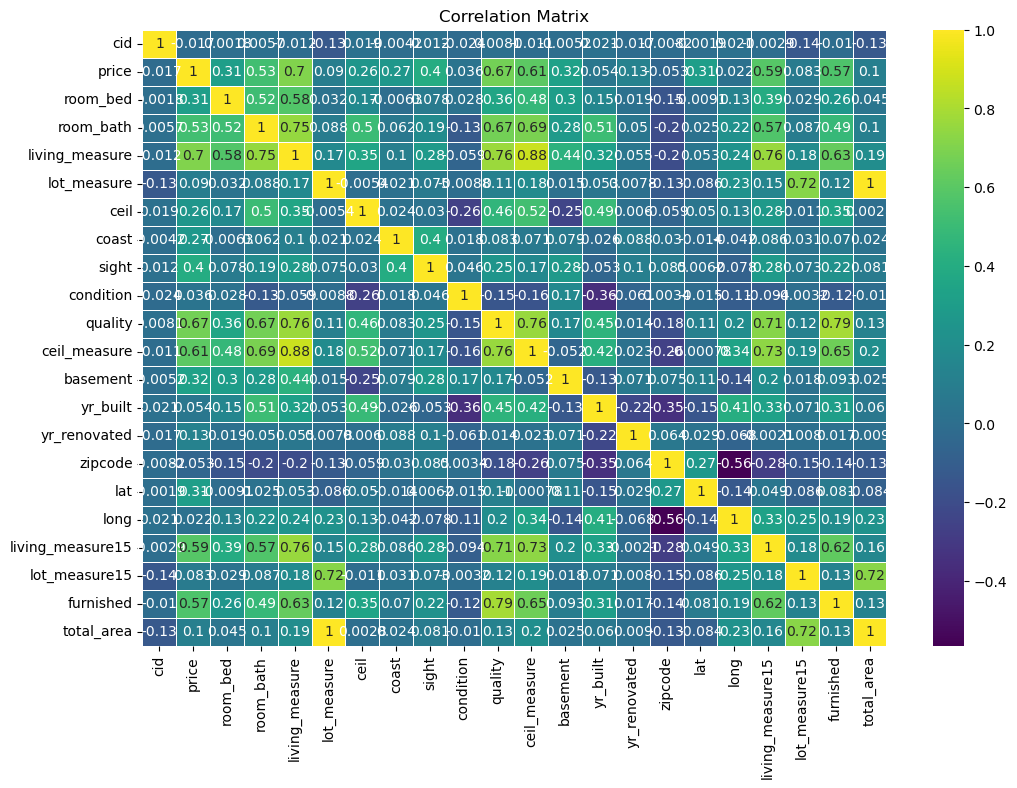

In [15]:
# Using a heatmap in order to find the correaltion between the variables of this dataset
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Data Visualizations

Oldest and newest year present in the dataset:
Oldest year: 1900.0, Newest year: 2015.0


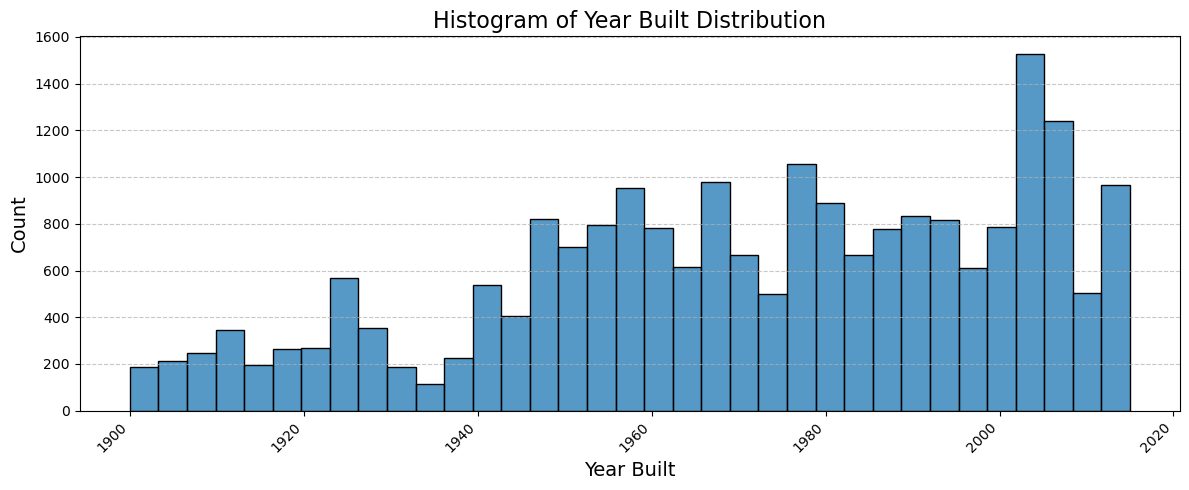

In [17]:
oldest_year = df["yr_built"].min()
newest_year = df["yr_built"].max()

print("Oldest and newest year present in the dataset:")
print(f"Oldest year: {oldest_year}, Newest year: {newest_year}")

plt.figure(figsize=(12, 5))
sns.histplot(df["yr_built"])
plt.title("Histogram of Year Built Distribution", fontsize=16)
plt.xlabel("Year Built", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

#### Relationship between Price and other variables
Employed Seaborn's pairplot method to quickly summarize the data. It will display pairwise relationships between various dataset variable subsets in the rows and columns.

The number of Floors, Bathrooms, and Bedrooms appears to positively correlate with both price and each other.

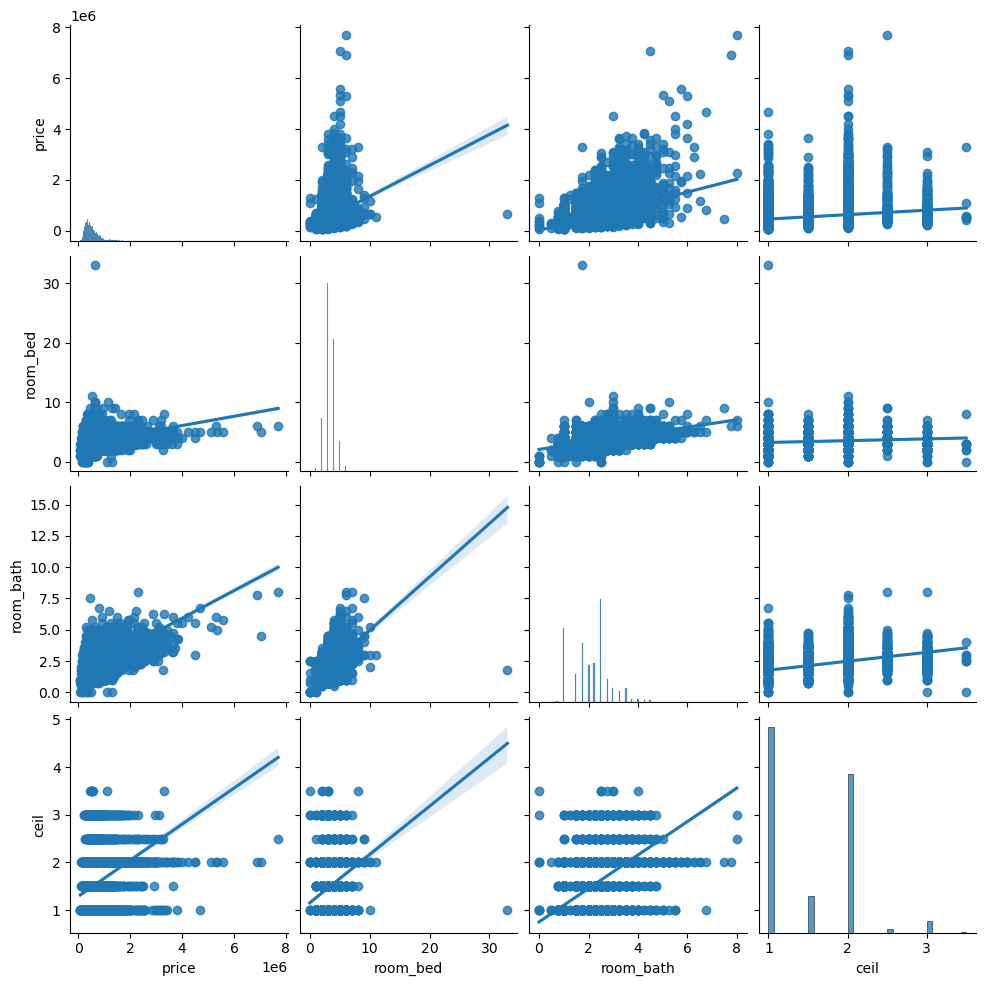

In [18]:
sns.pairplot(df,vars = ["price","room_bed","room_bath","ceil"], kind ="reg")

#### Price vs No.of Bedrooms

In [20]:
df['room_bed'].unique()

array([ 4.,  2.,  3.,  1.,  5.,  6., nan,  7., 10.,  8.,  0.,  9., 33.,
       11.])

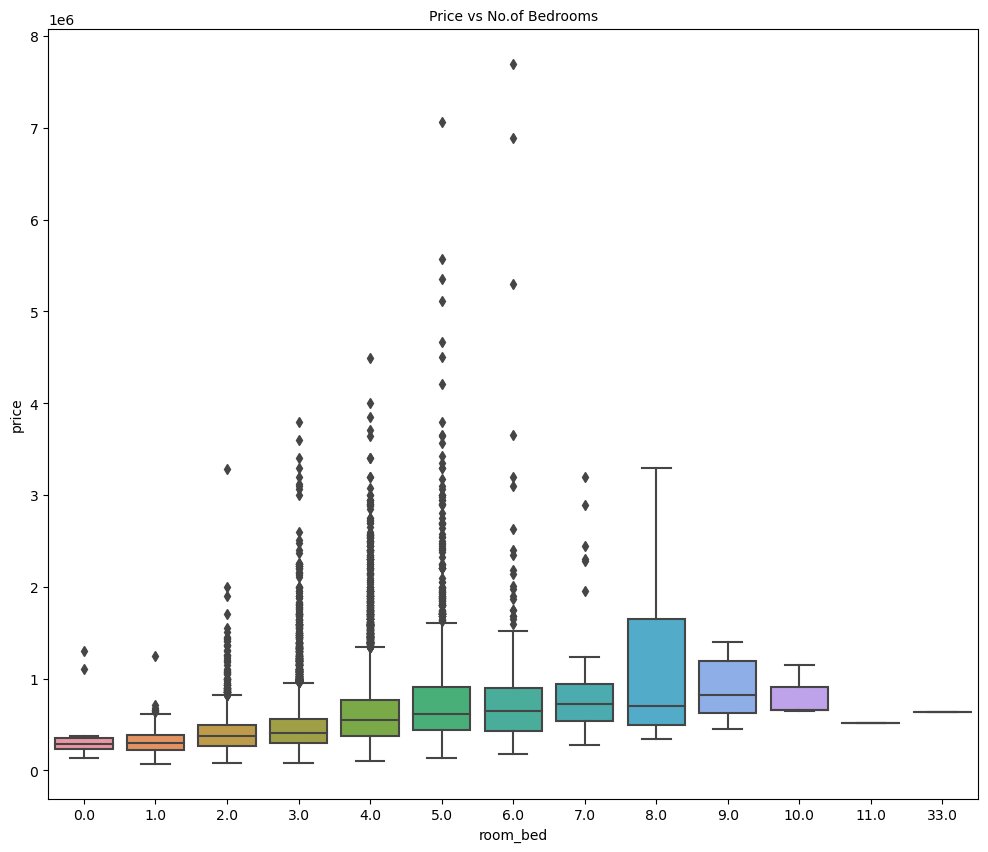

In [30]:
plt.subplots(figsize=(12,10))

#seaborn method to plot a boxplot using the specified variables from the dataset.
sns.boxplot(x="room_bed", y = "price",data= df)

plt.title('Price vs No.of Bedrooms',size = 10)
plt.show()

#### Price vs No.of Bathrooms

In [32]:
df['room_bath'].unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75,  nan, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25,
       6.  , 0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

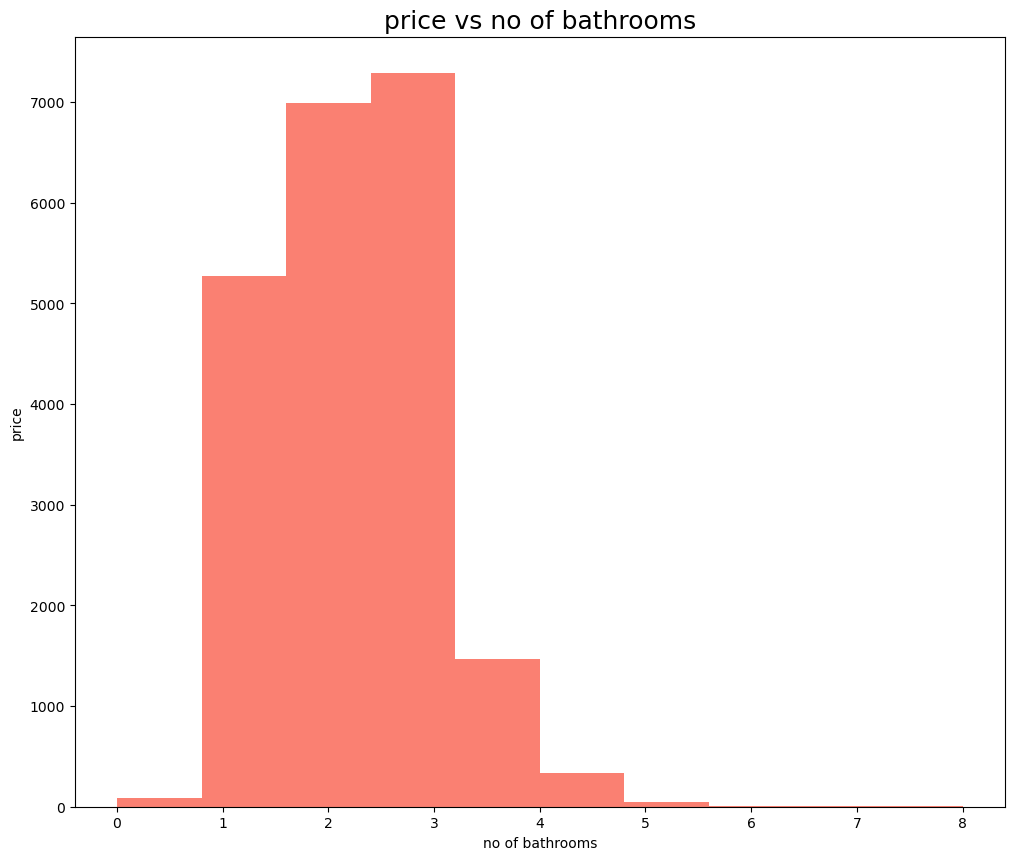

In [33]:
plt.subplots(figsize=(12,10))

#The underscore is a dummy variable used for making it 2D.
_=plt.hist(df['room_bath'],color='salmon')
_=plt.xlabel('no of bathrooms')
_=plt.ylabel('price')

plt.title('price vs no of bathrooms',size = 18)
plt.show()

#### Price vs No.of Bathrooms

In [37]:
df['ceil'].unique()


array([1. , 2. , 3. , 1.5, 2.5, nan, 3.5])

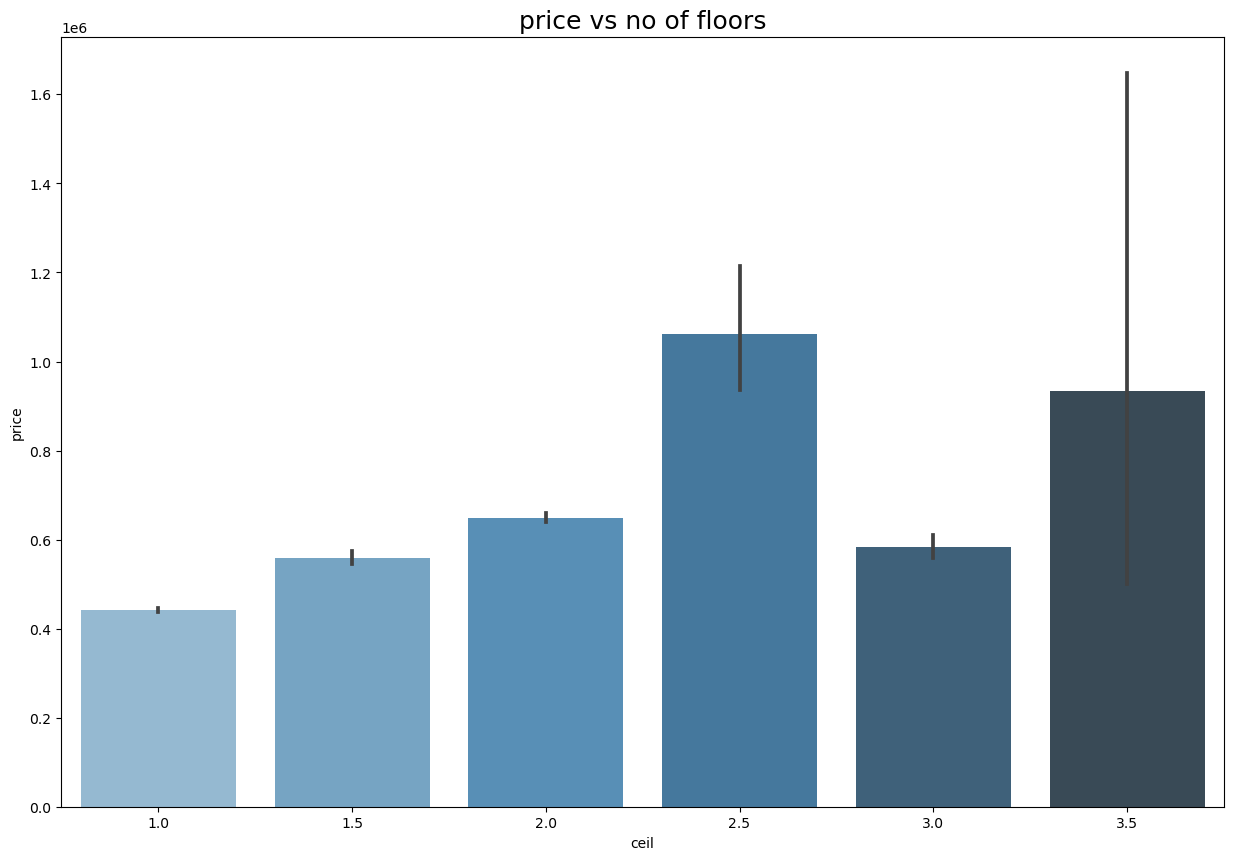

In [38]:
plt.subplots(figsize=(15,10))

#seaborn method for plotting a bargraph.
sns.barplot(x="ceil",y="price",data=df,palette="Blues_d")

plt.title('price vs no of floors',size = 18)
plt.show()